In [1]:
#Import library
import numpy as np #for proccess linear algebra
import pandas as pd #for proccess file csv
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization

In [2]:
#loading dataset diabetes
pokemon=pd.read_csv("Pokemon.csv") 

#see how much rows and column dataset
pokemon.shape

(800, 13)

In [3]:
#print some rows of the dataframe
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [4]:
#give information about data types, columns, null value counts, etc.
pokemon.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


# Data Prepocessing

In [5]:
#showing basic statistic details about the data (only numerical columns)
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
#showing the count of Nans
print(pokemon.isna().sum()) 

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [7]:
#remove space in columns
pokemon.columns=pokemon.columns.str.replace(' ','')
pokemon.head()

,#,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Data Analysis & Visualizations

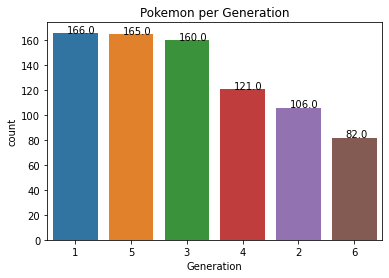

In [8]:
#show count of pokemon per generation
ax = sns.countplot(x='Generation', data=pokemon, order=pokemon['Generation'].value_counts().index)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.25, p.get_height()+0.01))
plt.title('Pokemon per Generation')
plt.show()

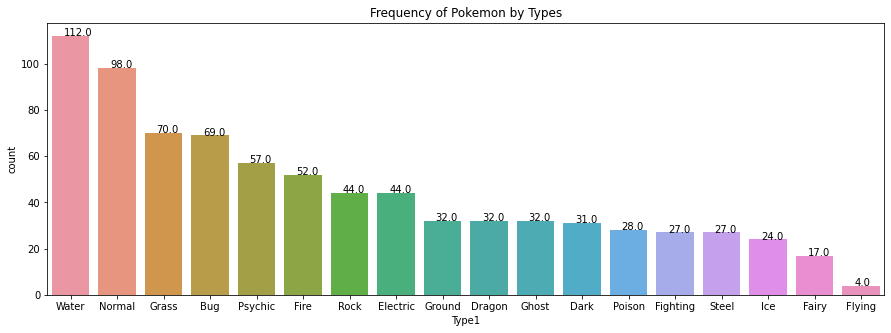

In [9]:
#show frequency of pokemon by type
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Type1', data=pokemon, order=pokemon['Type1'].value_counts().index)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.25, p.get_height()+0.01))
plt.title('Frequency of Pokemon by Types')
plt.show()

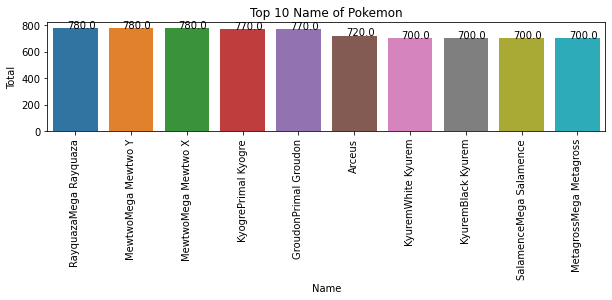

In [10]:
top_name = pokemon.sort_values(by='Total', ascending=False).reset_index()[:10]
plt.figure(figsize=(10,2))
ax = sns.barplot(x=top_name['Name'], y=top_name['Total'], data=pokemon)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.25, p.get_height()-1))
plt.title('Top 10 Name of Pokemon')
plt.xticks(rotation=90)
plt.show()

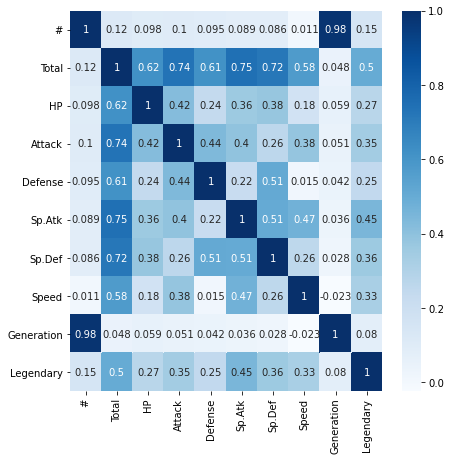

In [25]:
#showing correlation heatmap 
plt.figure(figsize=(7,7))
sns.heatmap(pokemon.corr(), annot=True, cmap='Blues');

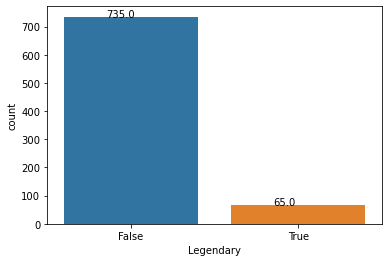

In [12]:
#checking data by plotting the count of outcome by their value
pokemon.Legendary.value_counts()
ax = sns.countplot(data=pokemon, x='Legendary')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.25, p.get_height()+0.01))
plt.show()

# Predictive Analysis

In [13]:
#mengelompokkan data yang digunakan untuk data training dan testing testing
x=pokemon[['Total','HP','Attack','Defense','Sp.Atk','Sp.Def','Speed','Generation']].copy()
y=pokemon.Legendary
print(x)
print(y)

     Total  HP  Attack  Defense  Sp.Atk  Sp.Def  Speed  Generation
0      318  45      49       49      65      65     45           1
1      405  60      62       63      80      80     60           1
2      525  80      82       83     100     100     80           1
3      625  80     100      123     122     120     80           1
4      309  39      52       43      60      50     65           1
..     ...  ..     ...      ...     ...     ...    ...         ...
795    600  50     100      150     100     150     50           6
796    700  50     160      110     160     110    110           6
797    600  80     110       60     150     130     70           6
798    680  80     160       60     170     130     80           6
799    600  80     110      120     130      90     70           6

[800 rows x 8 columns]
0      False
1      False
2      False
3      False
4      False
       ...  
795     True
796     True
797     True
798     True
799     True
Name: Legendary, Length: 800,

In [14]:
#data transformation use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7
0,0.230000,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,0.0
1,0.375000,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,0.0
2,0.575000,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,0.0
3,0.741667,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571,0.0
4,0.215000,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,0.0


In [15]:
#Import a module to split into training and testing data
from sklearn.model_selection import train_test_split 

#split training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [16]:
#Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Set up an array to store the accuracy of the training data and testing data
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate (neighbors):
    knn=KNeighborsClassifier(n_neighbors=k) #set up knn classifier by k neighbors
    knn.fit(x_train, y_train) #fit the model
    train_accuracy[i]=knn.score(x_train, y_train) #calculate the accuracy on the training set
    test_accuracy[i]=knn.score(x_test, y_test) #calculate the accuracy on the testing set

In [17]:
#finding score training data and testing data
train_score=[]
test_score =[]
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test, y_test))

In [18]:
#score of training data
max_train_score = max (train_score)
train_scores_ind = [i for i, v in enumerate(train_score)
if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x:
x+1, train_scores_ind))))

Max train score 99.86111111111111 % and k = [1]


In [19]:
#score of testing data
max_test_score = max (test_score)
test_scores_ind = [i for i, v in enumerate(test_score)
if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100, list(map(lambda x:
x+1, test_scores_ind))))

Max test score 95.0 % and k = [1, 2, 3]


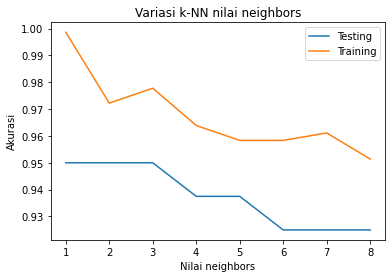

In [20]:
#Data visualization of training data and testing data score
plt.title('Variasi k-NN nilai neighbors')
plt.plot(neighbors, test_accuracy, label='Testing')
plt.plot(neighbors, train_accuracy, label='Training')
plt.legend()
plt.xlabel('Nilai neighbors')
plt.ylabel('Akurasi')
plt.show()

In [21]:
#prepare knn Classifier by k neighbors
knn = KNeighborsClassifier(n_neighbors=1)
#Fit the model
knn.fit(x_train,y_train)
#show knn score
knn.score(x_test,y_test)

0.95

In [22]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
#showing the accuracy of data predictions
y_pred = knn.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
Actual,,,
False,72,2,74
True,2,4,6
All,74,6,80


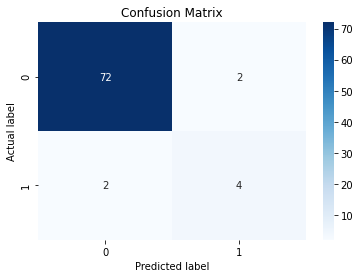

In [23]:
#showing heatmap confusion matrix for knn algorithm
y_pred = knn.predict(x_test)
from sklearn import metrics
cf = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cf), annot=True, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()